# C-OPS data processing for C-HARRIER MISSIONS
## Batch processing for mission day C-air files

This script allows for fast and easy quicklooks of C-OPS radiometry data for data efficacy checks. The following script processes a full day of C-air air data, stitches them together, and plots the radiometric science data.

In [1]:
## IMPORT NECESSARY LIBRARIES 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import matplotlib.dates as mdates
import re

### Inputs
In the following cell, input the sensor you wish to process (sensor), the path to the days files (path), the directory which contains the day's flight data (diry), the path which contains the missions C-air data (path), and the path where you wish to save the figure (outpath).

In [2]:
sensor = 'lt'
diry = 'today20211027'
path = '/Users/jakravit/OneDrive - NASA/C-HARRIER_2021_C-AIR/C-AIR/'
outpath = '/Users/jakravit/Desktop/Cair_figs/'

### Read and plot data

The following cell reads through the directory, processing each time segment file for the given sensor, stithces the data together, plots and saves the figures. X-axis is in form Day : Hour : minutes

300205917.csv
300193517.csv
300210117.csv
300190817.csv
300185017.csv
300202117.csv
300211817.csv
300200517.csv
300204017.csv
300184917.csv
300203817.csv
300195417.csv
300191117.csv
300195617.csv
300191317.csv
300200717.csv
300204217.csv
300202317.csv
300185217.csv
300210317.csv
300193717.csv
300185617.csv
300202717.csv
300193317.csv
300210717.csv
300195217.csv
300191717.csv
300200317.csv
300204617.csv
300183717.csv
300200117.csv
300204417.csv
300192817.csv
300195017.csv
300191517.csv
300210517.csv
300193117.csv
300201817.csv
300202517.csv
300185417.csv
300194917.csv
300204317.csv
300200617.csv
300191217.csv
300195717.csv
300210217.csv
300193617.csv
300202217.csv
300185317.csv
300185117.csv
300202017.csv
300190917.csv
300193417.csv
300210017.csv
300205817.csv
300191017.csv
300195517.csv
300184817.csv
300203917.csv
300204117.csv
300200417.csv
300211917.csv
300191417.csv
300195117.csv
300212017.csv
300192917.csv
300204517.csv
300200017.csv
300194817.csv
300202417.csv
300185517.csv
300201

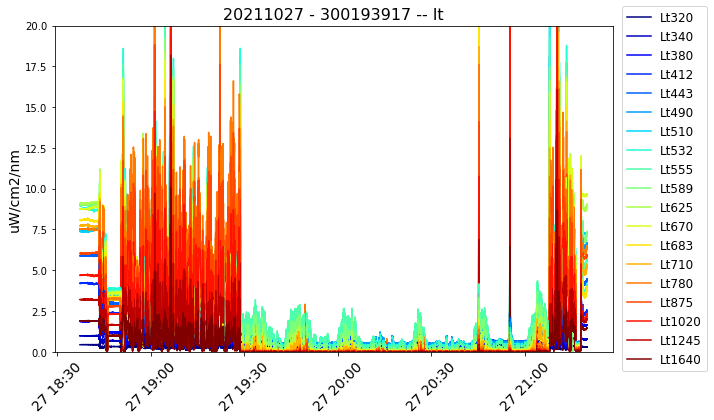

In [3]:
diry = diry+'/'
date = re.findall('[0-9]+', diry)[0]
flist = os.listdir(path+diry)
if not os.path.exists(outpath+diry):
    os.mkdir(outpath+diry)
    
fig, ax = plt.subplots(figsize=(10,6))
suffixes = ('Aux.csv','Log.csv','bunk')
for f in flist:
    if not f.endswith(suffixes):
        if not f.startswith('.'):
            print(f)
            
            name = f[:-4]
            file = path+diry+f
            data = pd.read_csv(file, sep=',', encoding='ISO-8859-1', index_col='DateTimeUTC')
            data.index = pd.to_datetime(data.index)  
            
            sensors = {'es': data.iloc[:,5:24],
                        'li': data.iloc[:,24:43],
                        'lt': data.iloc[:,43:]}
            
           
            colormap = plt.cm.gist_ncar
            plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, sensors[sensor].shape[1]))))
            labels = []
            for i,b in enumerate(sensors[sensor].columns):
                ax.plot(data.index,data[b],)# marker='o',s=2)
                labels.append('{}'.format(b.split(' ')[0]))
    
ax.legend(labels,loc='right',bbox_to_anchor=(1.18, .5),fontsize='large')
plt.xticks(rotation=45,fontsize=14)
ax.set_ylabel('uW/cm2/nm',fontsize=14)
ax.set_title('{} - {} -- {}'.format(date,name,sensor),fontsize=16)
ax.set_ylim(0,20)
fig.savefig('{}/{}_{}.png'.format(outpath+diry,name,sensor),bbox_inches='tight',dpi=300)